Film yorumlarını pozitif veya negatif olarak 2 sınıfa ayırma

IMDB veriseti, 50000 kutuplaştırılmış yorum. 25000 test, 25000 eğitim olarak ayrılır. Her ikisi de %50 pozitif ve negatif veriler içerir.

### Neden aynı veri üstünde eğitmiyoruz?

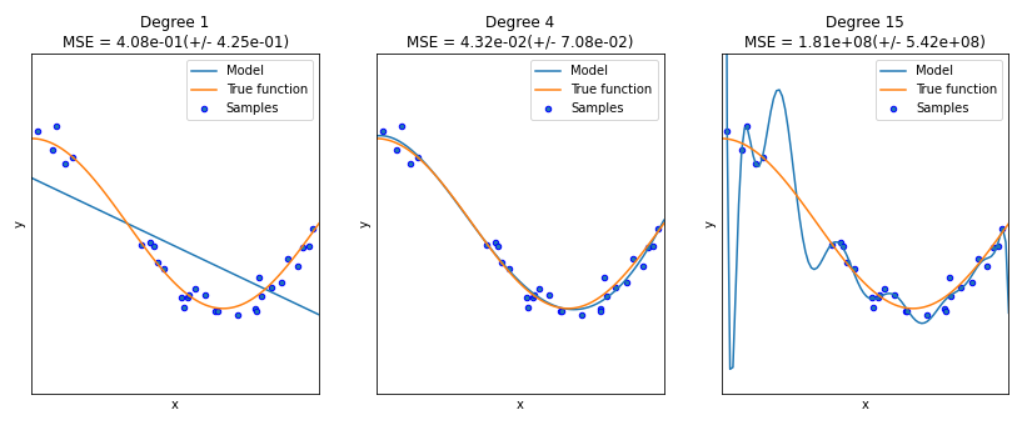

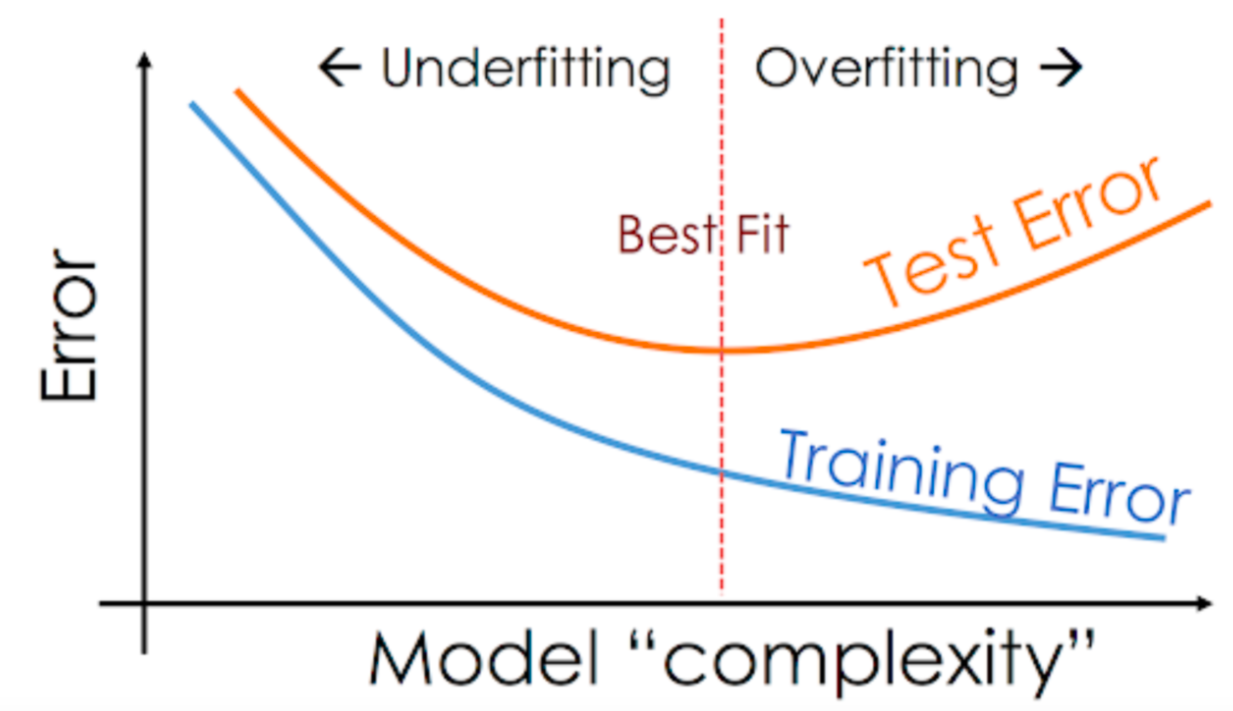

In [1]:
import plaidml.keras
plaidml.keras.install_backend()

import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

from keras import backend as K

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\alikr\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\alikr\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

In [3]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
len(train_data[0])

218

#### 0 = negatif, 1 = pozitif

In [6]:
train_labels[0]

1

Bir örnekte maksimum 10000 eleman var.

In [7]:
max([max(sequence) for sequence in train_data])

9999

Sayıları kelimelere çevirme işlemi

In [8]:
word_index = imdb.get_word_index() 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Sayı listesini olduğu gibi nöral ağa veremeyiz. Tensor'e çevirmemiz gerekiyor.

Ve one-hot encode kullanarak listeyi 0 ve 1 den oluşan vektörlere dönüştür.

In [10]:
import numpy as np 

# Tüm 0 olan matris şekillerini (len(sequences),dimension)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): results[i, sequence] = 1.
    # Sets specific indices
    return results
    # of results[i] to 1s
x_train = vectorize_sequences(train_data)
    #Vectorized training data
x_test = vectorize_sequences(test_data)
    #Vectorized test data

In [11]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [12]:
x_train.shape

(25000, 10000)

y verisini array'a çeviriyoruz

In [13]:
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [14]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [15]:
y_train.shape

(25000,)

### Building your network

* Kaç katman kullanılmalı?
* Her katman için kaç gizli birim kullanılmalı?

Bu sorulara 4. bölümde değinilecek.

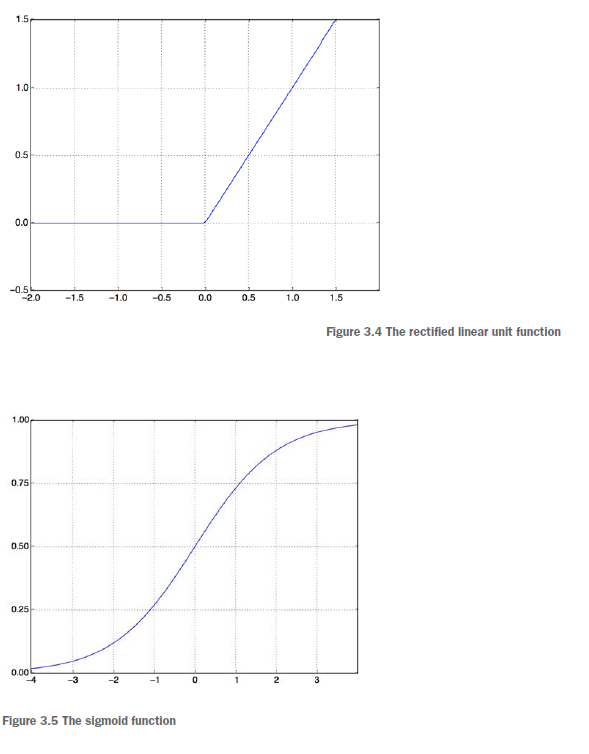

In [16]:
from keras import models 
from keras import layers

model = models.Sequential() 
model.add(layers.Dense(16,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


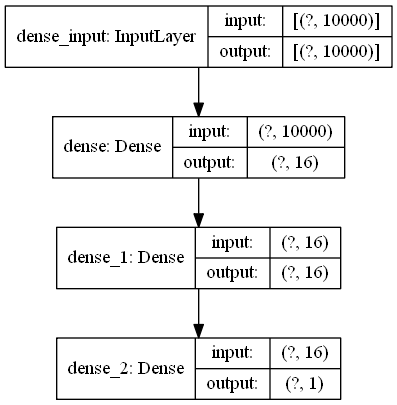

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

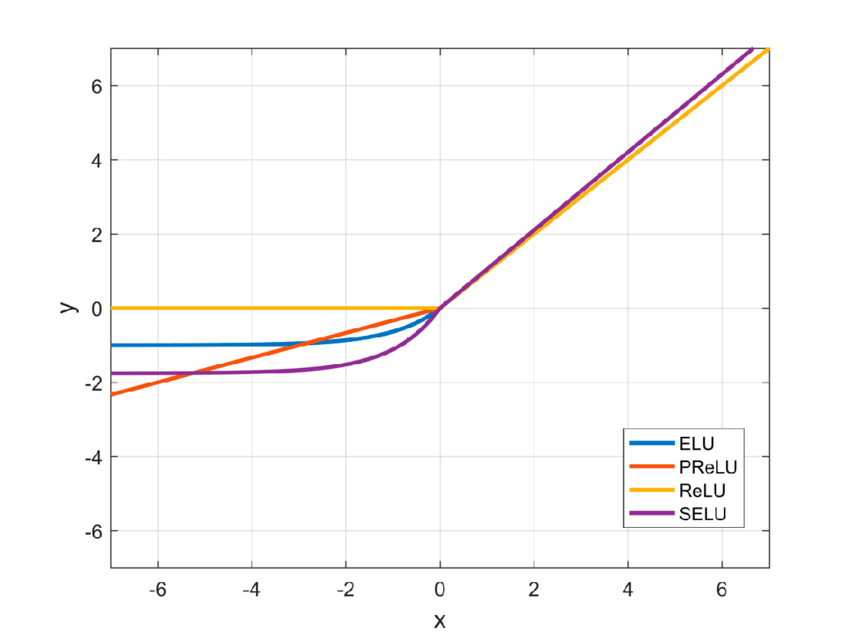

### Compiling the model

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Softmax outputları 1 ile 0 arasına sıkıştırdığı için crossentropy değeri tahmin kötüleştikçe mean_squared_error değerinden daha çok artacak. Bu nedenle crossentropy kullanıldı

### Configuring the optimizer

In [19]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Using custom losses and metrics

In [20]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### Validating your approach

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [22]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5407 - acc: 0.7766 - val_loss: 0.4162 - val_acc: 0.8468
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.3242 - acc: 0.9029 - val_loss: 0.3126 - val_acc: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2347 - acc: 0.9227 - val_loss: 0.3037 - val_acc: 0.8778
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1858 - acc: 0.9403 - val_loss: 0.2753 - val_acc: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1498 - acc: 0.9539 - val_loss: 0.3018 - val_acc: 0.8829
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1265 - acc: 0.9598 - val_loss: 0.2873 - val_acc: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1034 - acc: 0.9696 - val_loss: 0.3141 - val_acc: 0.8873
Epoch 8/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0886 - a

In [24]:
history_dict = history.history

In [25]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Plotting the training and validation loss

In [26]:
history_dict["acc"]

[0.7766000032424927,
 0.9029333591461182,
 0.9227333068847656,
 0.9403333067893982,
 0.9539333581924438,
 0.9598000049591064,
 0.9696000218391418,
 0.9739333391189575,
 0.98253333568573,
 0.9844666719436646,
 0.9891999959945679,
 0.990066647529602,
 0.9935333132743835,
 0.9951333403587341,
 0.9968666434288025,
 0.9975333213806152,
 0.9977333545684814,
 0.9995333552360535,
 0.9983999729156494,
 0.9988666772842407]

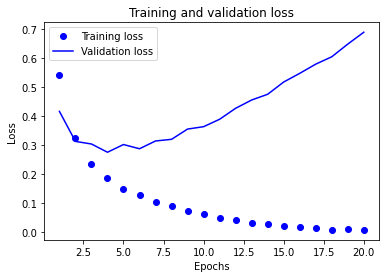

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict["acc"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # "bo" mavi nokta oluşturmak için
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # b mavi çizgi oluşturmak için
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting the training and validation accuracy

<div class="alert alert-block alert-info">
<b>Tip:</b> Eğer önceki grafiğin üstüne çizim yapıyorsa kodun başına plt.clf() yaz
</div>

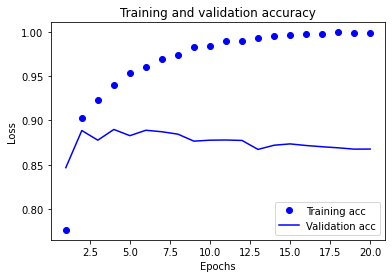

In [28]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Retraining a model from scratch

Overfitting'i engellemek için 20 yerine 4 epoch yapacağız

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
print("Train eğitimi")
model.fit(x_train, y_train, epochs=4, batch_size=512)
print("Test verisindeki sonuç")
results = model.evaluate(x_test, y_test)

Train eğitimi
Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4369 - accuracy: 0.8189
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2513 - accuracy: 0.9111
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1991 - accuracy: 0.9276
Epoch 4/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1655 - accuracy: 0.9411
Test verisindeki sonuç
782/782 [==============================] - 2s 2ms/step - loss: 0.3227 - accuracy: 0.8743


### Using a trained network to generate predictions on new data

In [30]:
model.predict(x_test)

array([[0.23694053],
       [0.9998781 ],
       [0.9758588 ],
       ...,
       [0.12984666],
       [0.08698976],
       [0.80270594]], dtype=float32)

### Further Experiments

Katman Sayısı:3
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


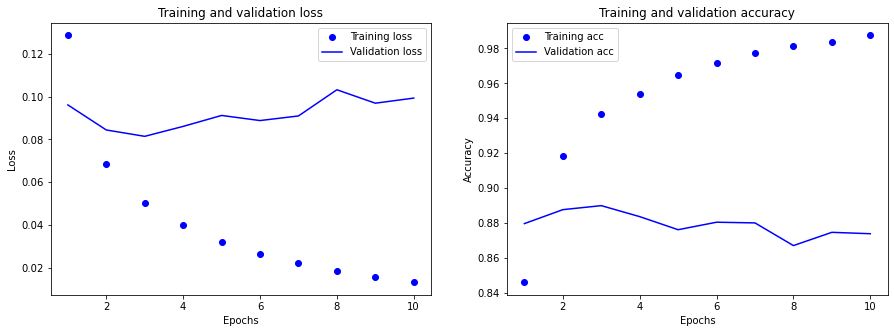

Katman Sayısı:3
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


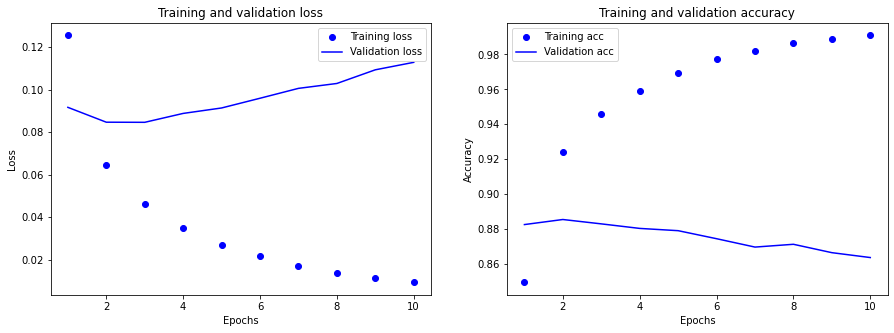

Katman Sayısı:3
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


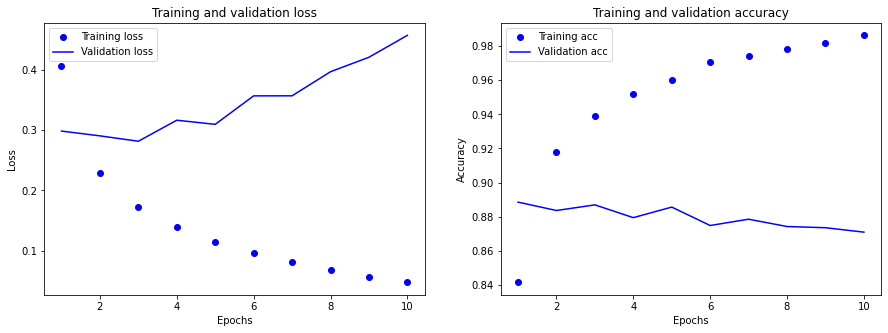

Katman Sayısı:3
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


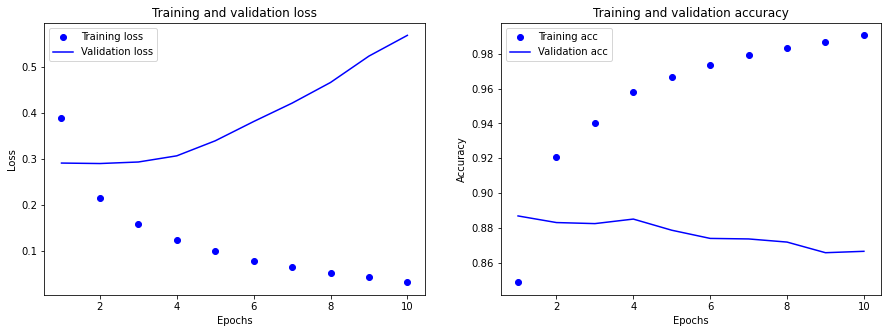

Katman Sayısı:3
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


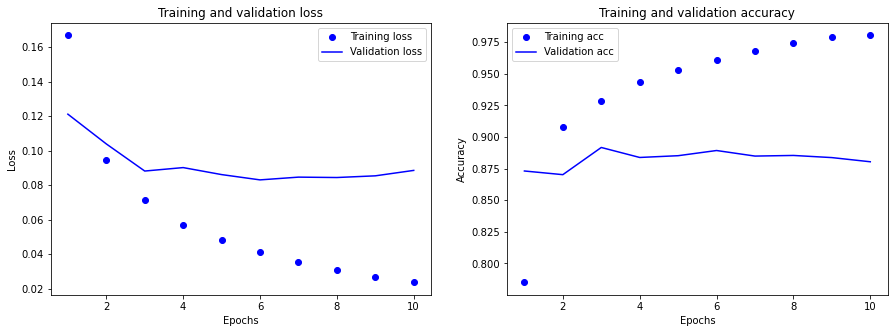

Katman Sayısı:3
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


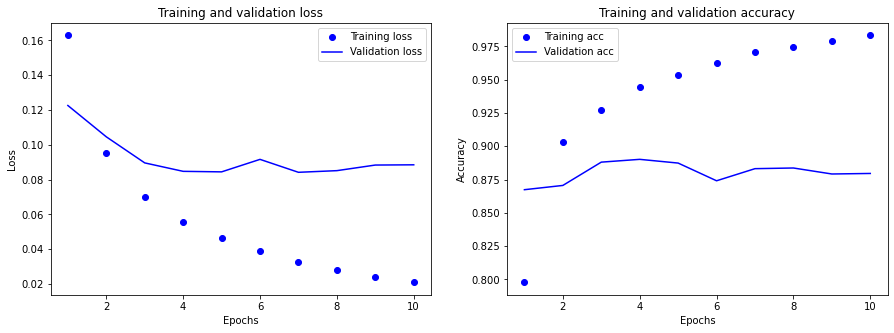

Katman Sayısı:3
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


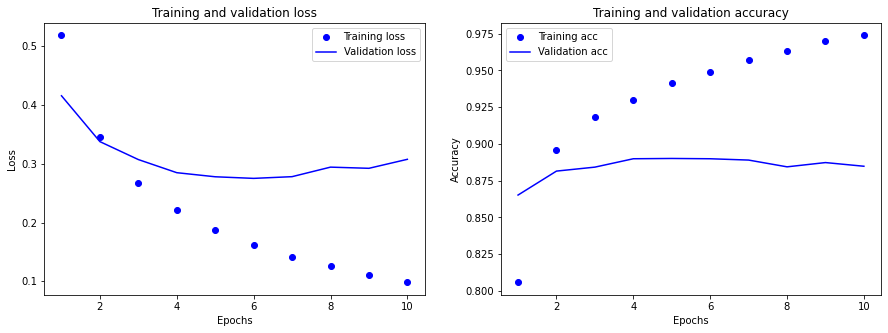

Katman Sayısı:3
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


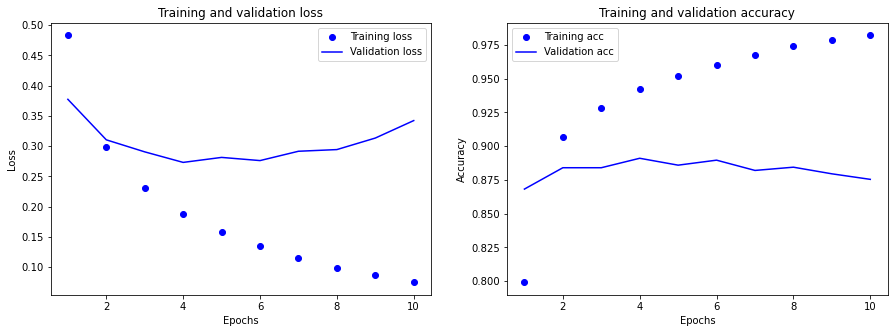

Katman Sayısı:3
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


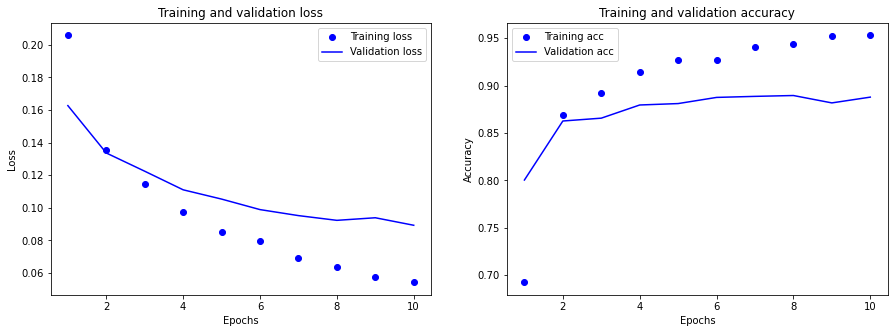

Katman Sayısı:3
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


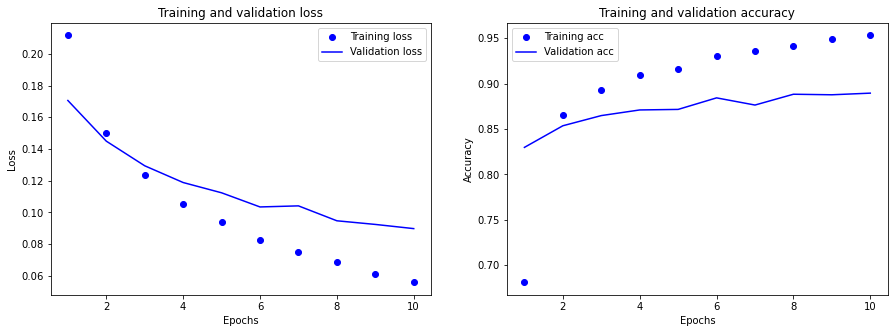

Katman Sayısı:3
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


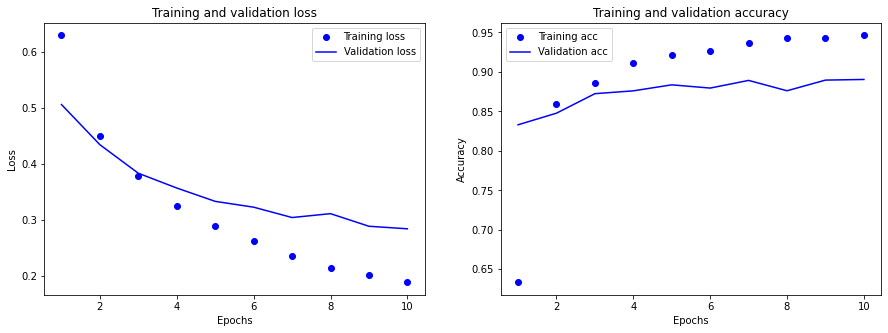

Katman Sayısı:3
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


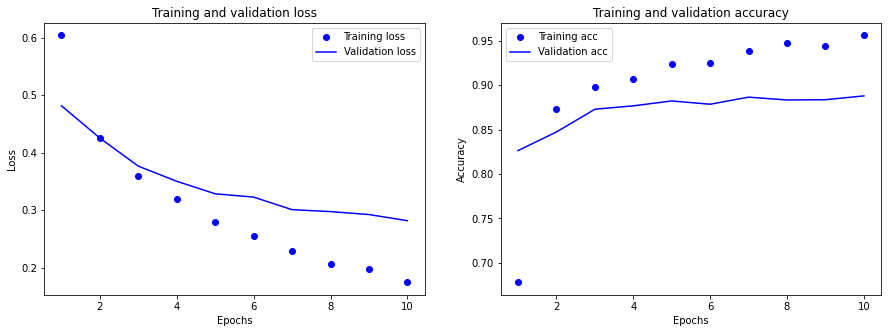

Katman Sayısı:3
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


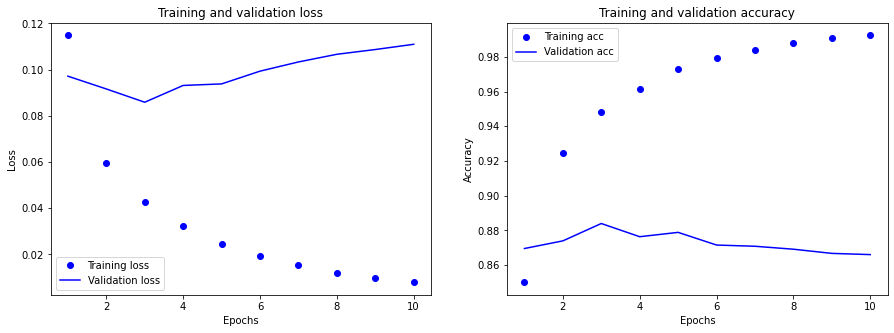

Katman Sayısı:3
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


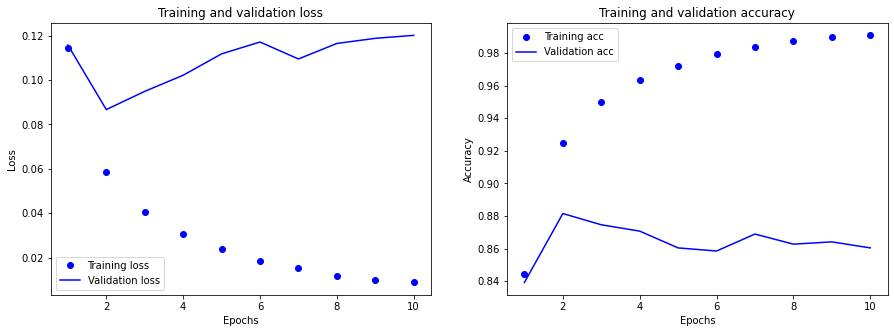

Katman Sayısı:3
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


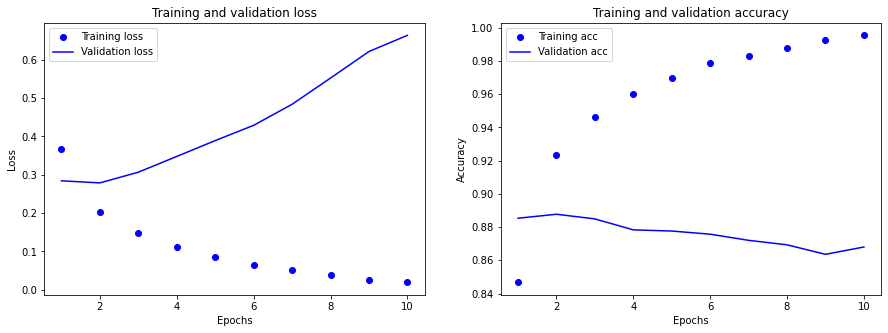

Katman Sayısı:3
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


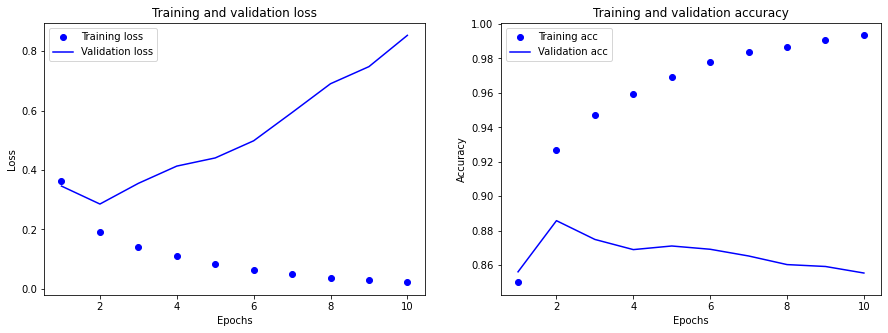

Katman Sayısı:3
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


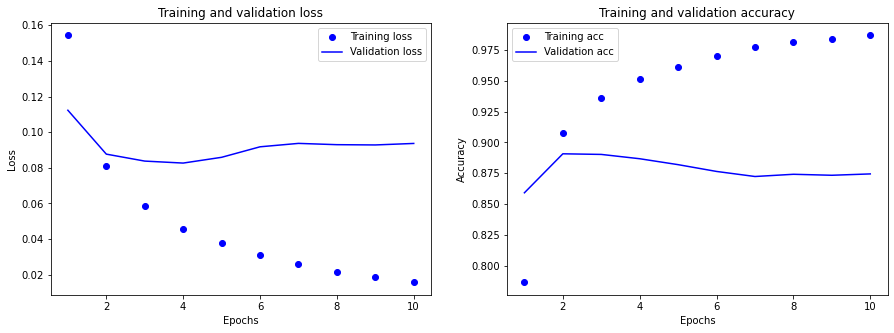

Katman Sayısı:3
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


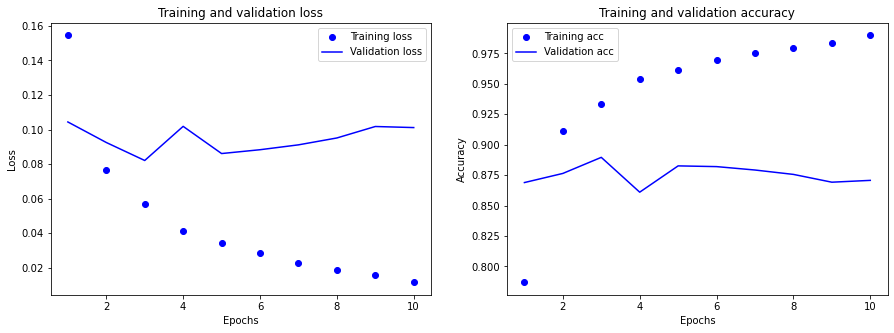

Katman Sayısı:3
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


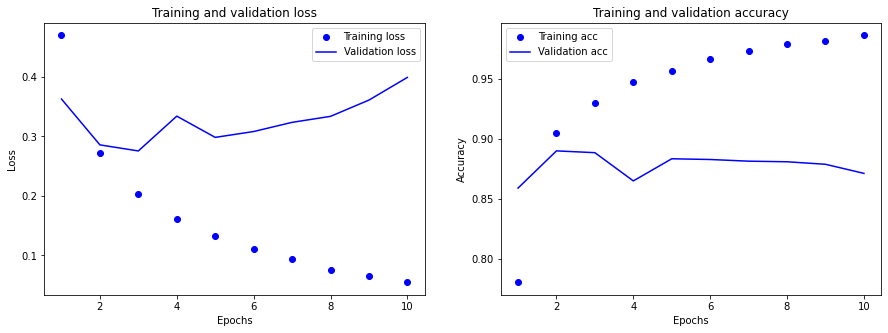

Katman Sayısı:3
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


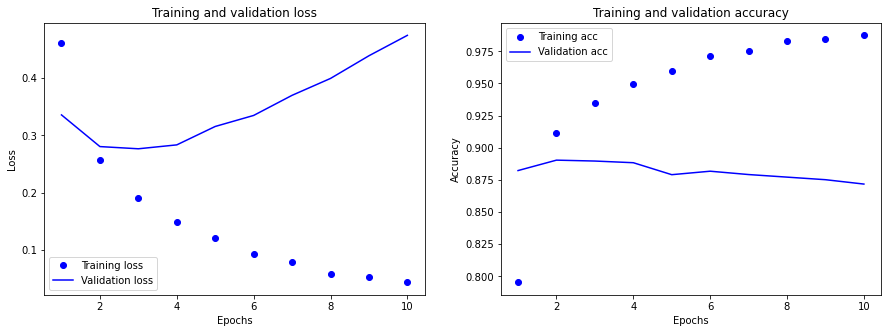

Katman Sayısı:3
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


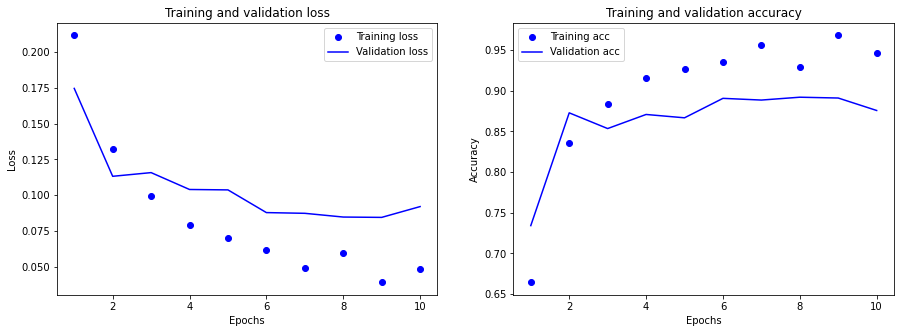

Katman Sayısı:3
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


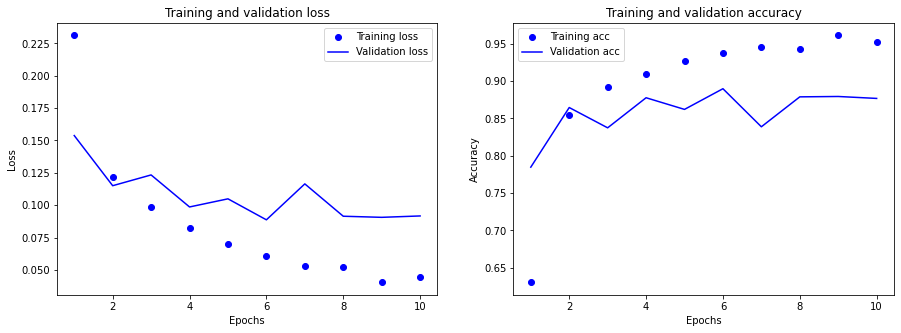

Katman Sayısı:3
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


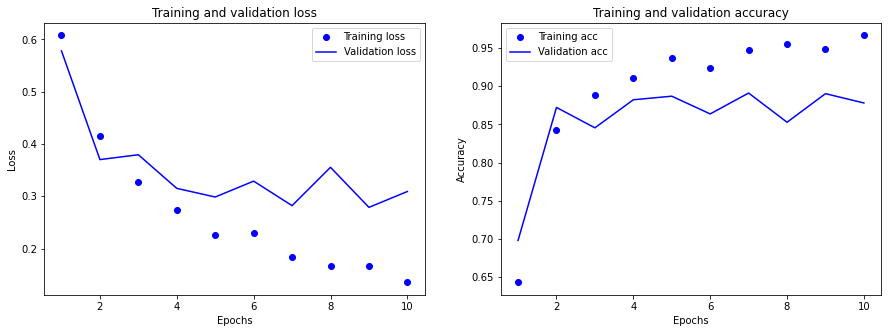

Katman Sayısı:3
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


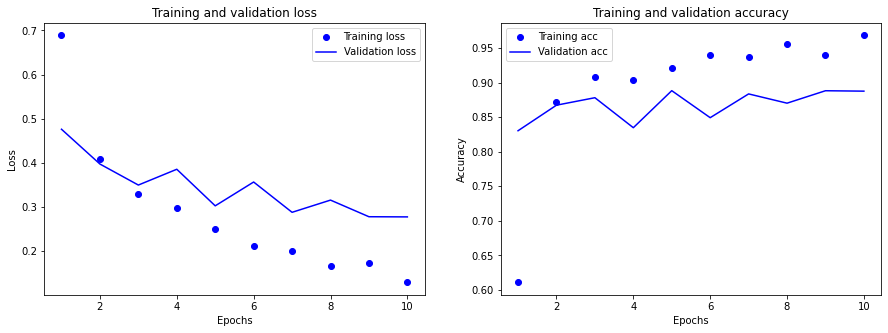

Katman Sayısı:9
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


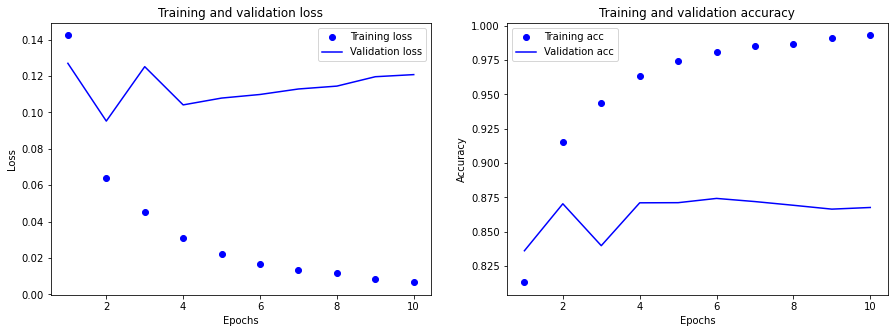

Katman Sayısı:9
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


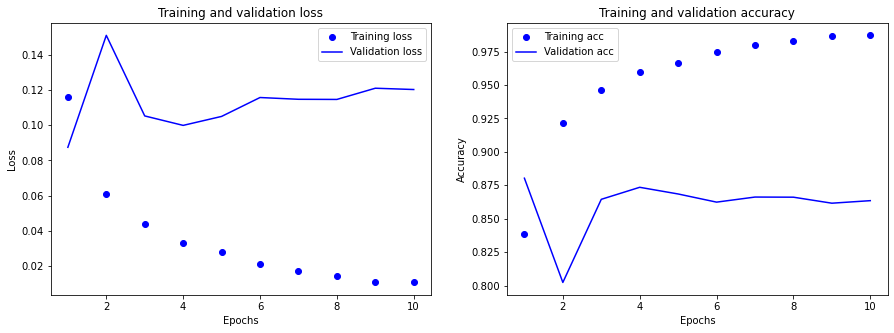

Katman Sayısı:9
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


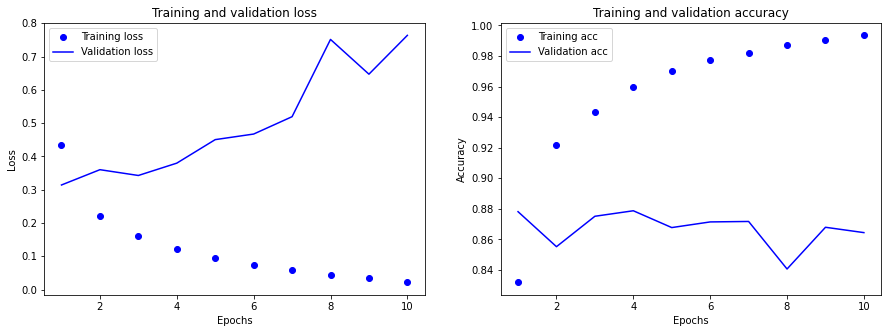

Katman Sayısı:9
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


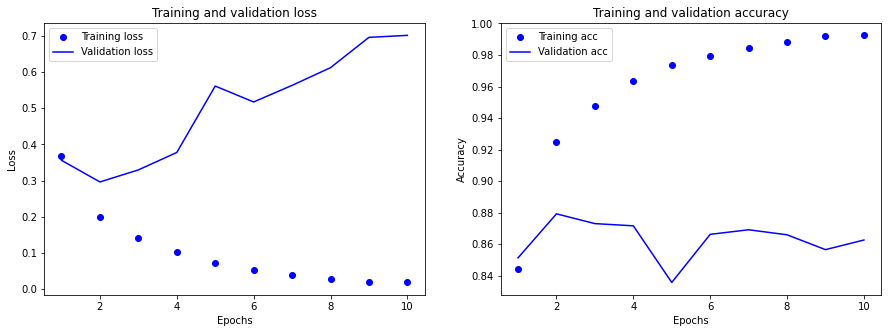

Katman Sayısı:9
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


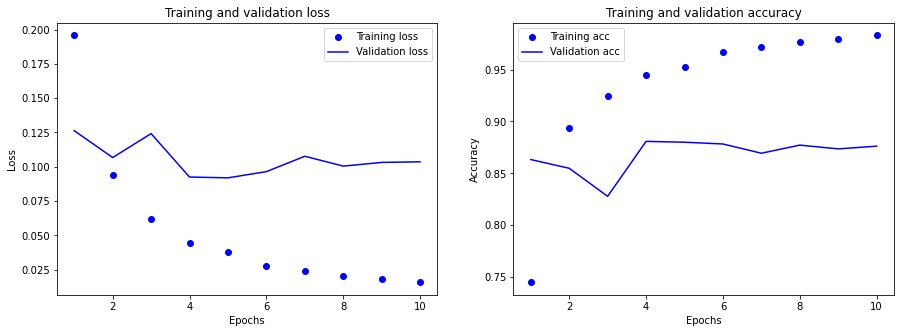

Katman Sayısı:9
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


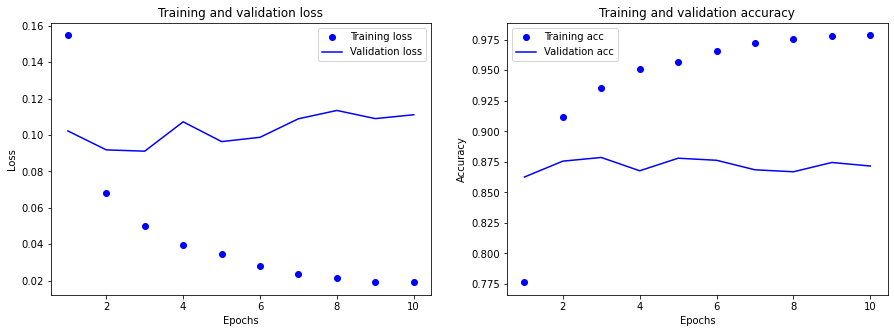

Katman Sayısı:9
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


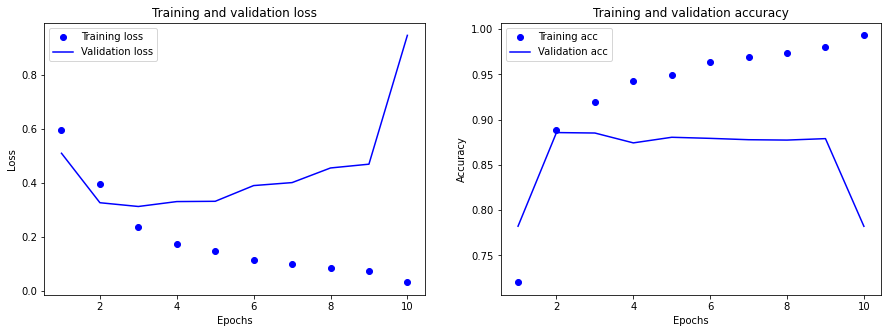

Katman Sayısı:9
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


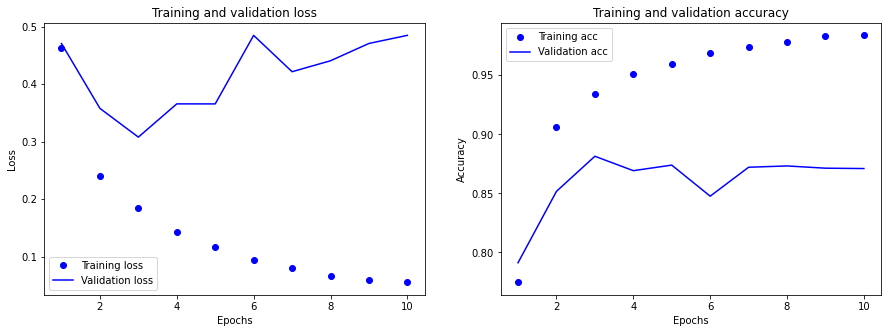

Katman Sayısı:9
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


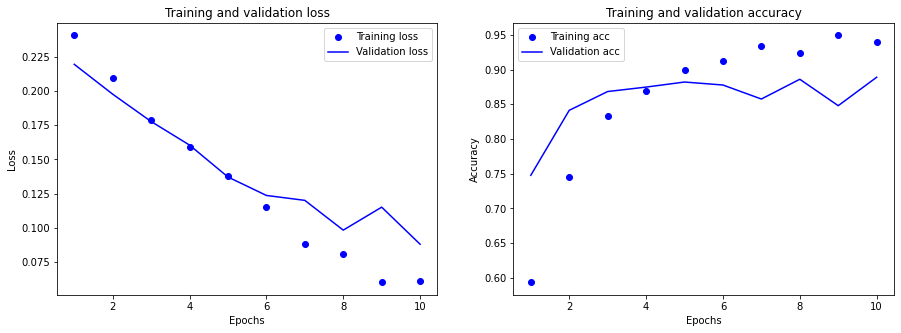

Katman Sayısı:9
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


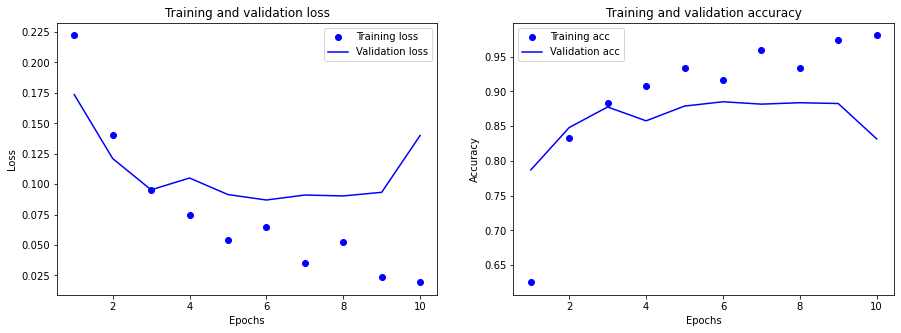

Katman Sayısı:9
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


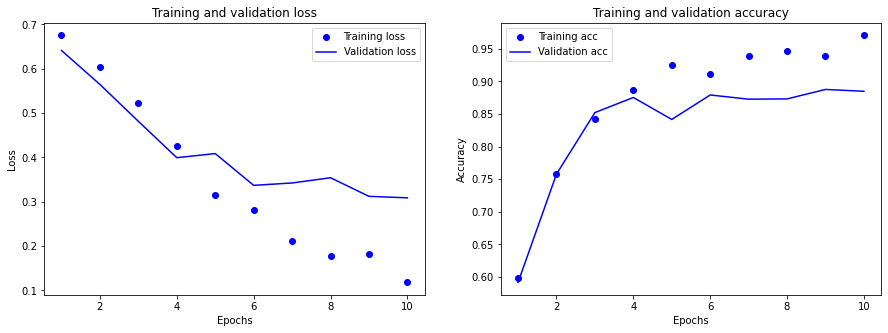

Katman Sayısı:9
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


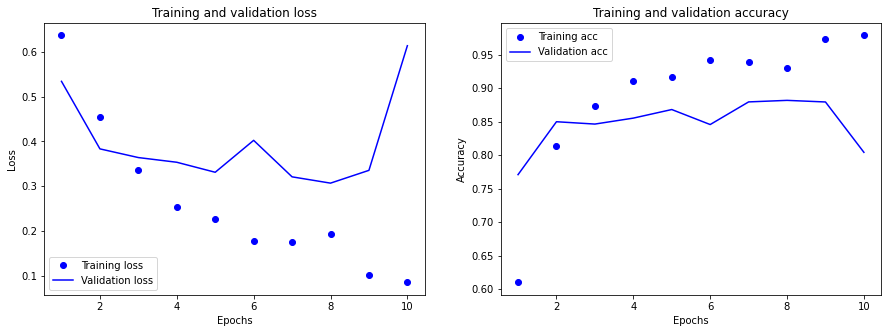

Katman Sayısı:9
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


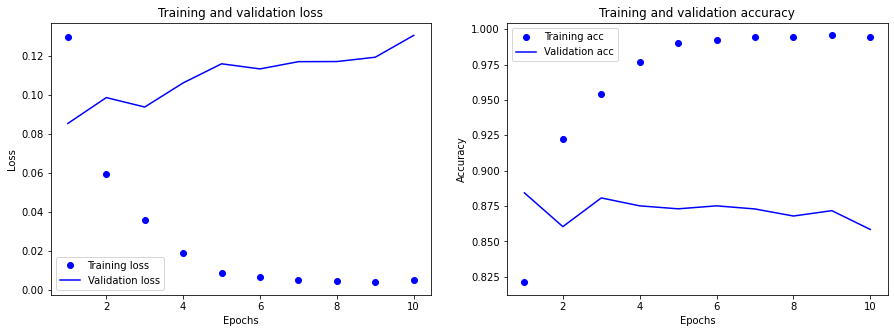

Katman Sayısı:9
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


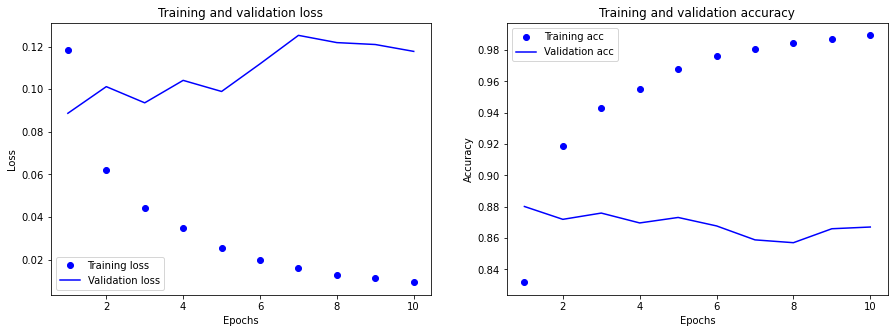

Katman Sayısı:9
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


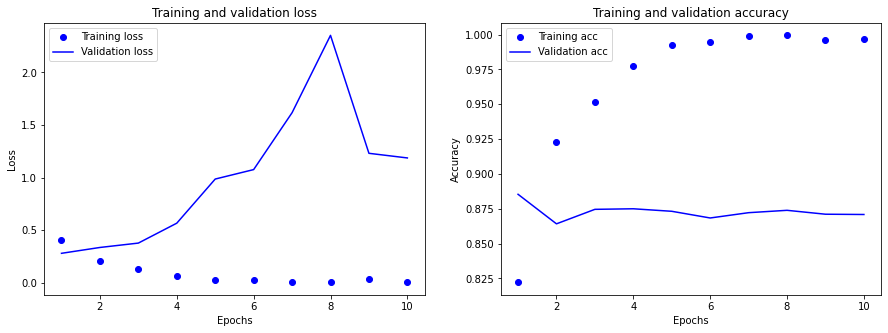

Katman Sayısı:9
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


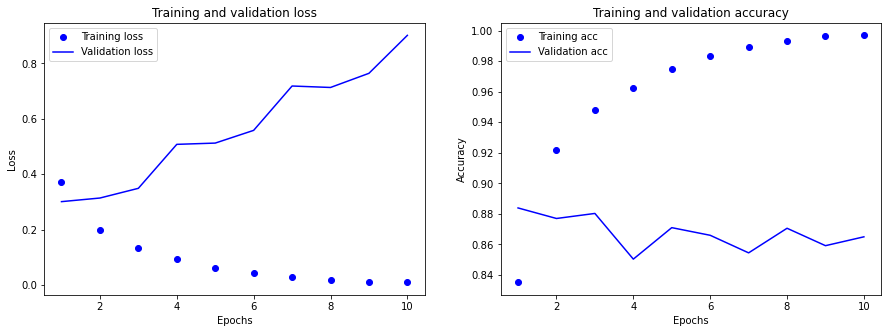

Katman Sayısı:9
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


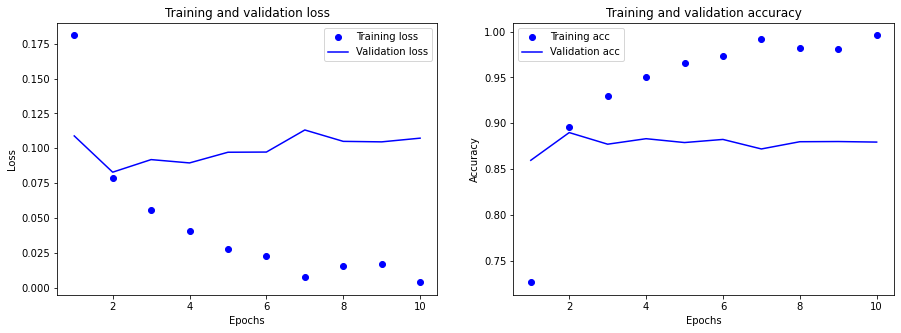

Katman Sayısı:9
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


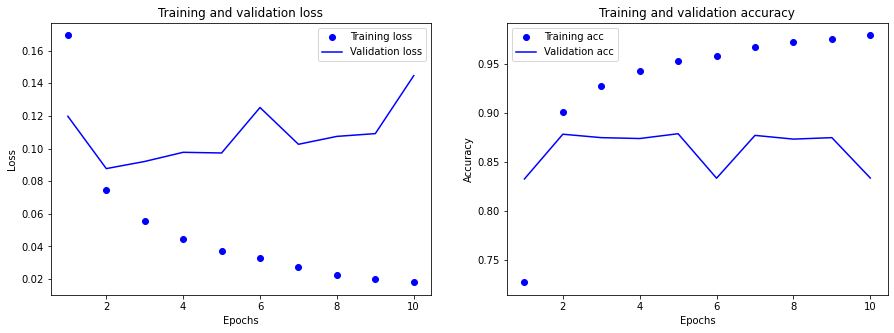

Katman Sayısı:9
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


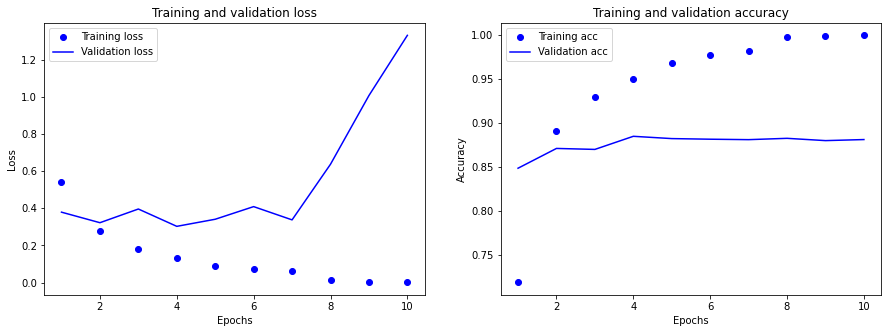

Katman Sayısı:9
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


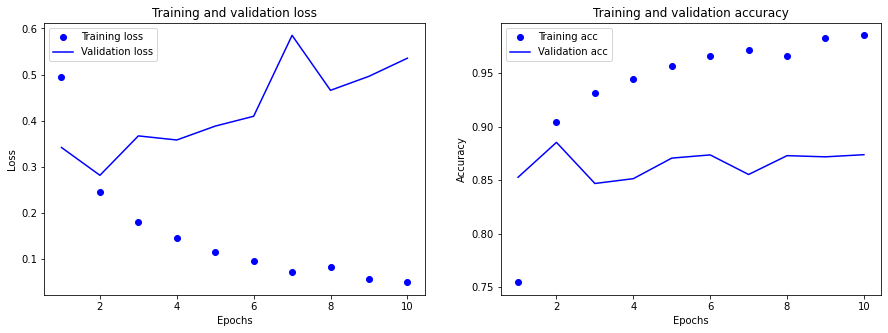

Katman Sayısı:9
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


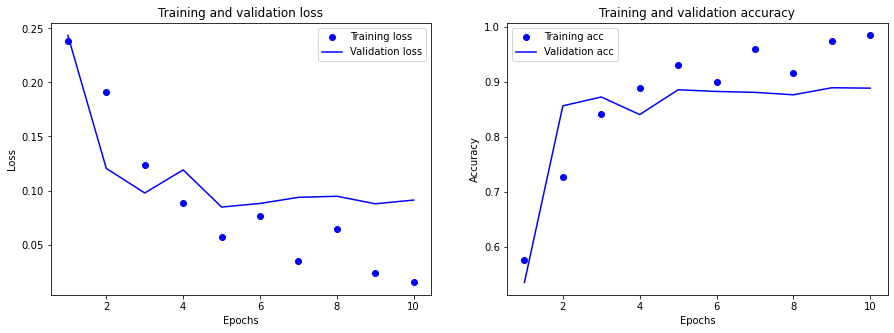

Katman Sayısı:9
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


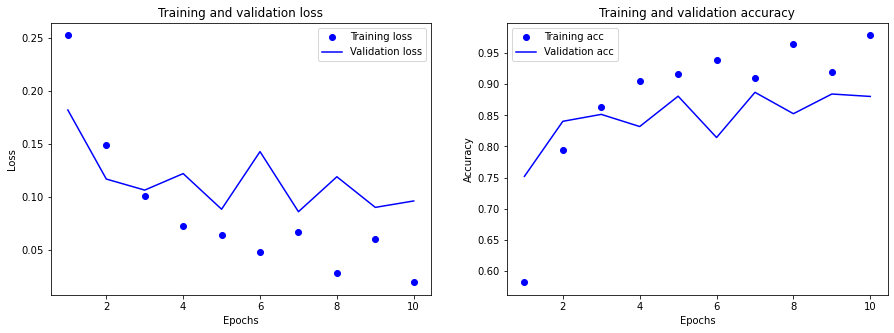

Katman Sayısı:9
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


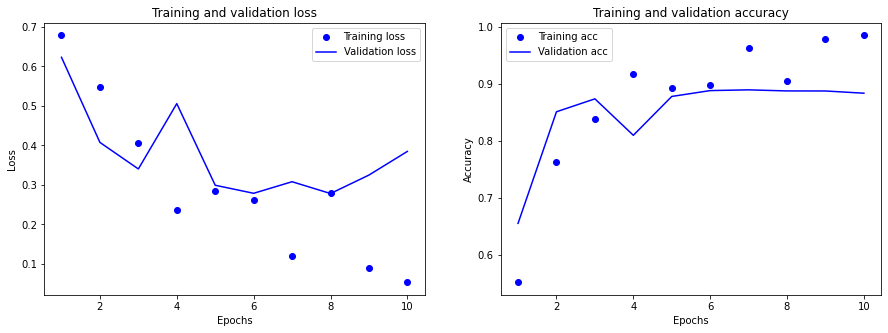

Katman Sayısı:9
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


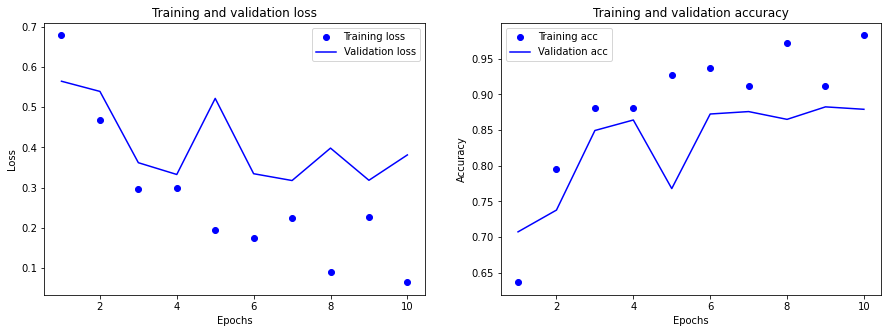

Katman Sayısı:18
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


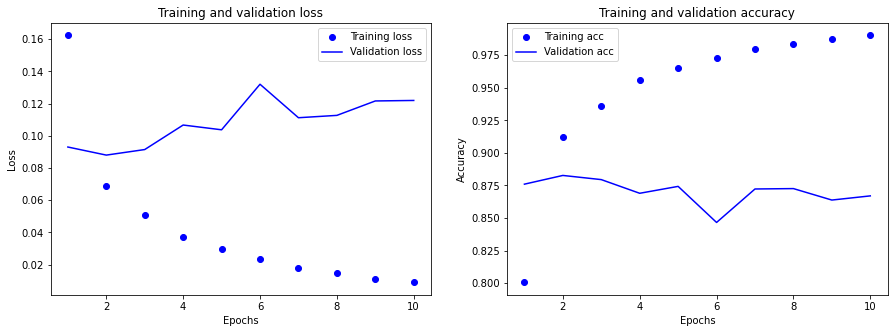

Katman Sayısı:18
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


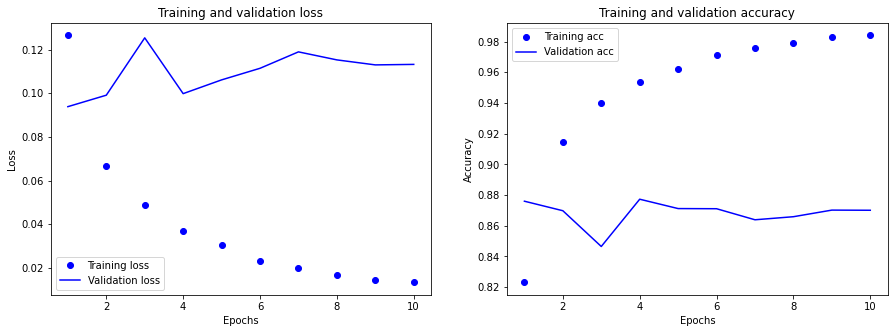

Katman Sayısı:18
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


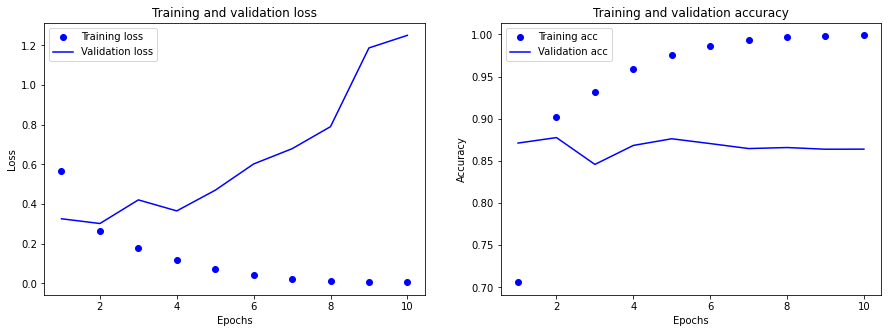

Katman Sayısı:18
Dense Sayisi:16
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


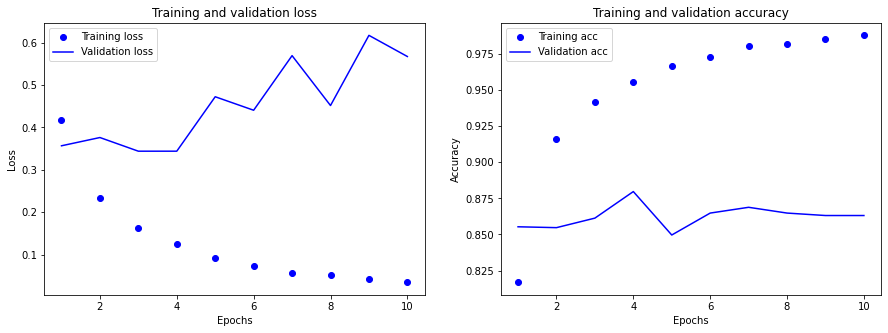

Katman Sayısı:18
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


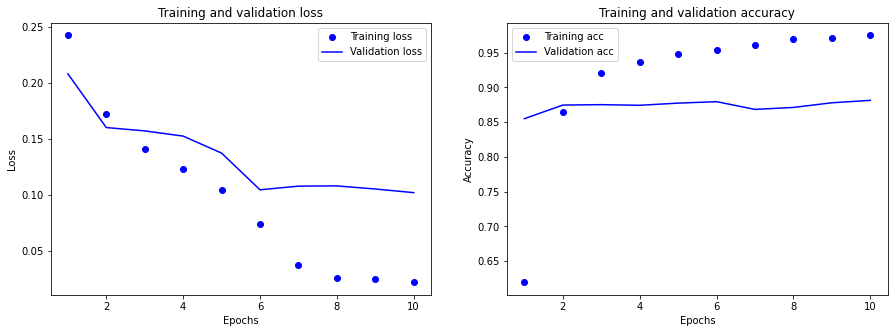

Katman Sayısı:18
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


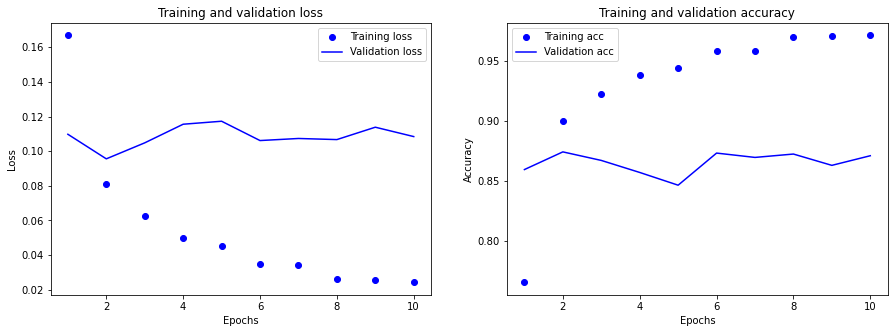

Katman Sayısı:18
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


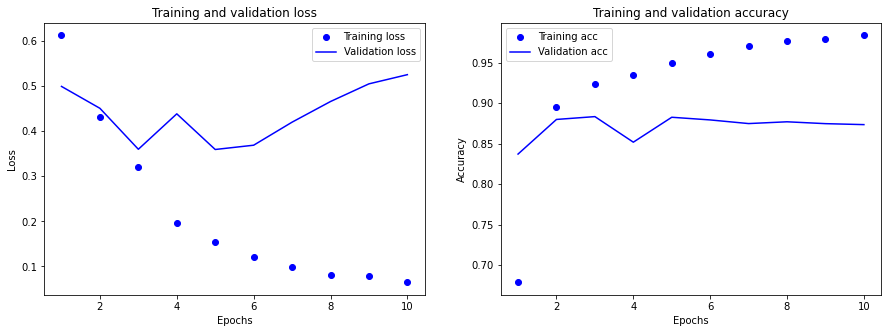

Katman Sayısı:18
Dense Sayisi:16
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


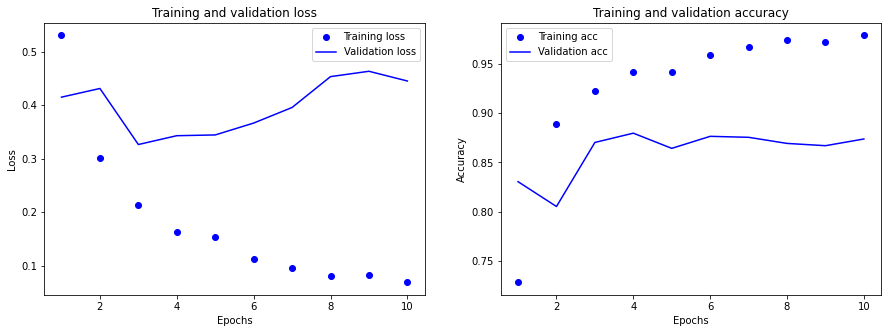

Katman Sayısı:18
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


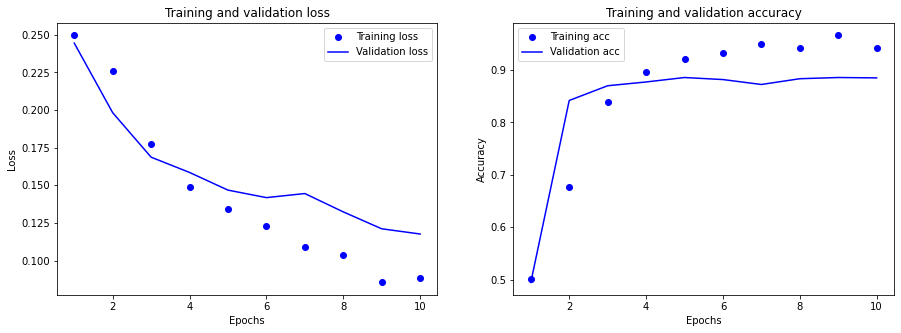

Katman Sayısı:18
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


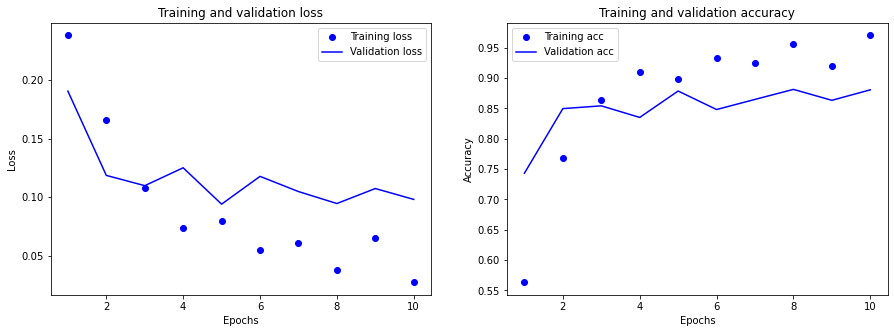

Katman Sayısı:18
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


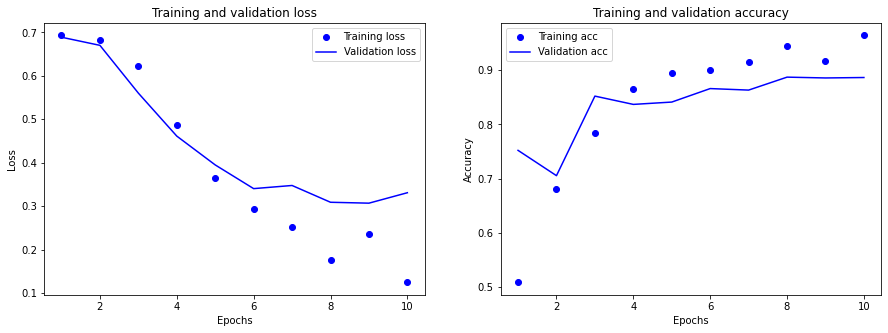

Katman Sayısı:18
Dense Sayisi:16
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


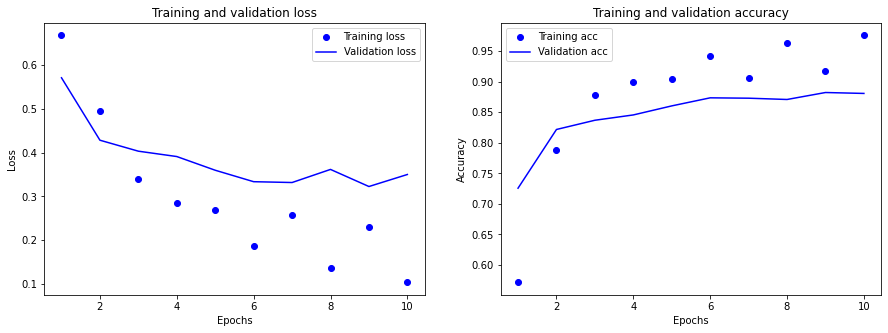

Katman Sayısı:18
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


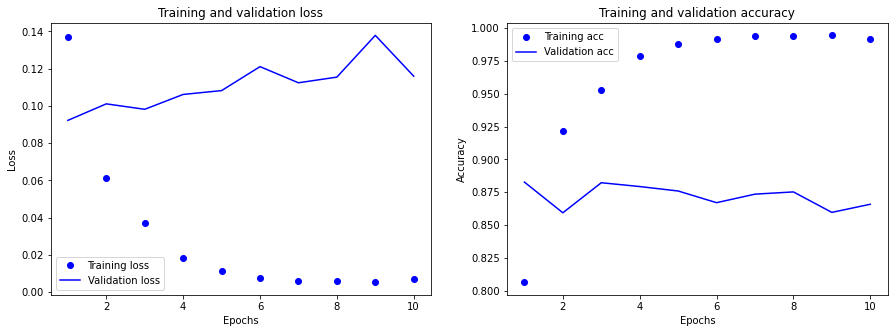

Katman Sayısı:18
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


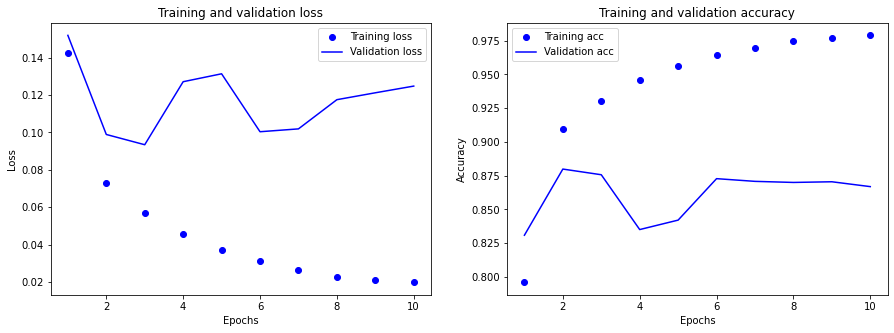

Katman Sayısı:18
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


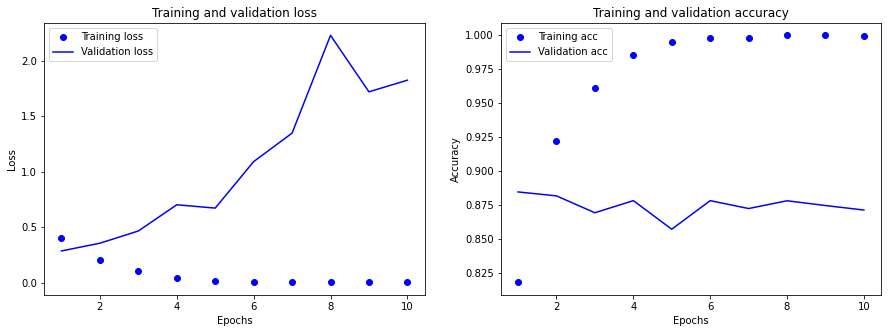

Katman Sayısı:18
Dense Sayisi:64
Batch size:128
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


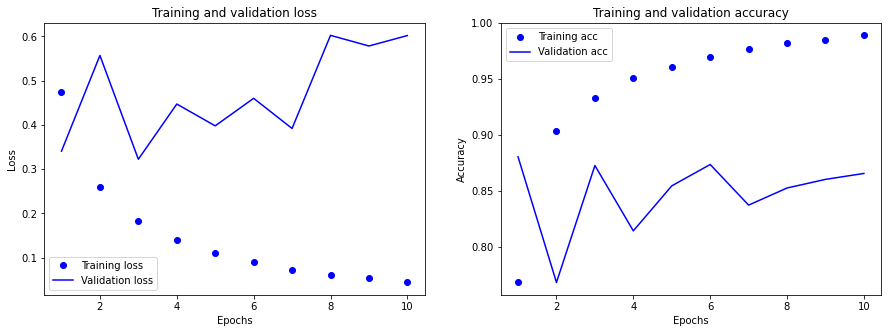

Katman Sayısı:18
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


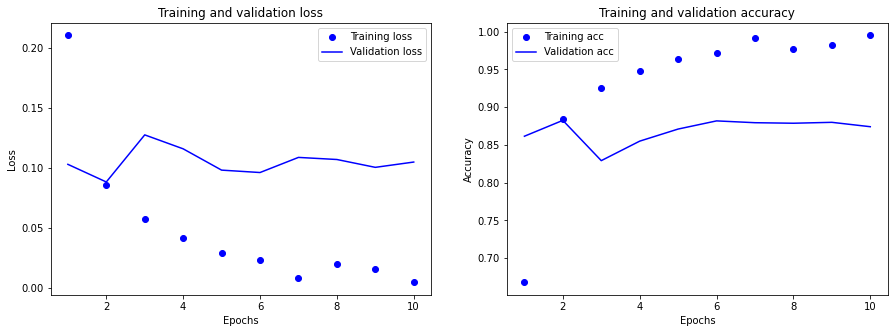

Katman Sayısı:18
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


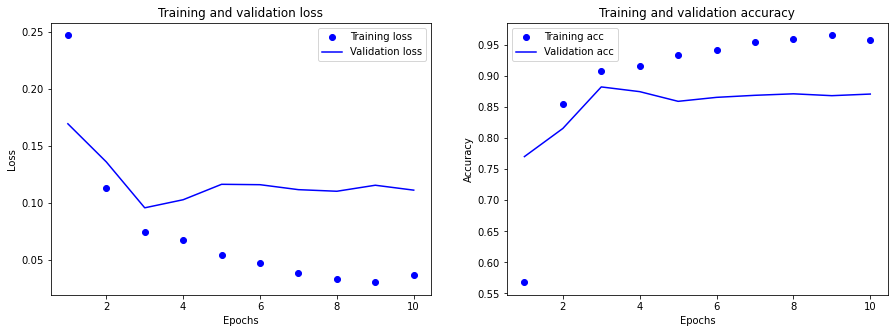

Katman Sayısı:18
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


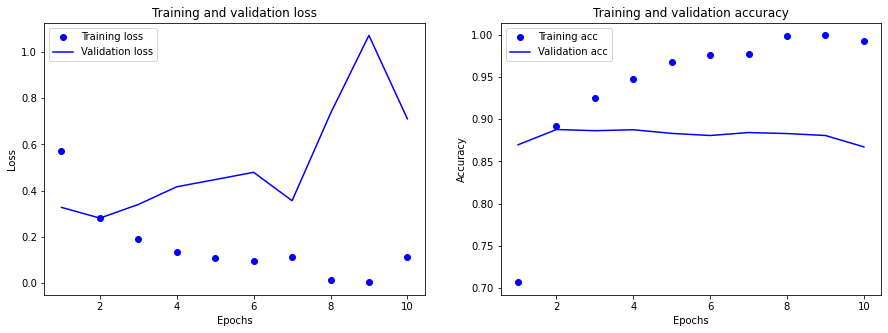

Katman Sayısı:18
Dense Sayisi:64
Batch size:512
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


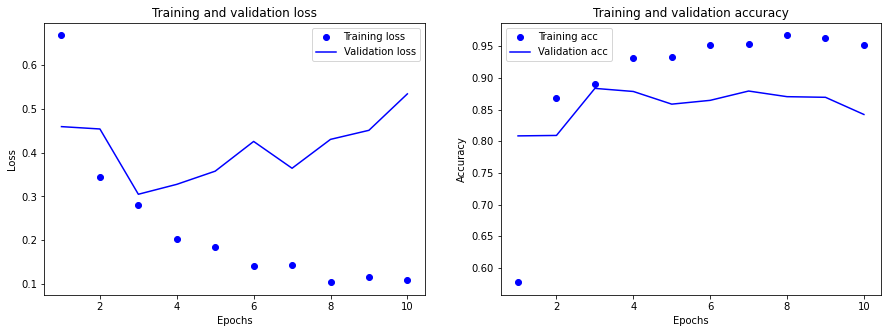

Katman Sayısı:18
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:relu


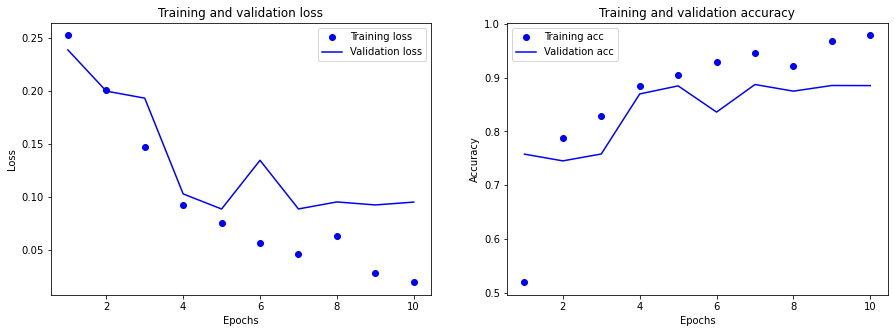

Katman Sayısı:18
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:mse
Aktivasyon fonksiyonu:tanh


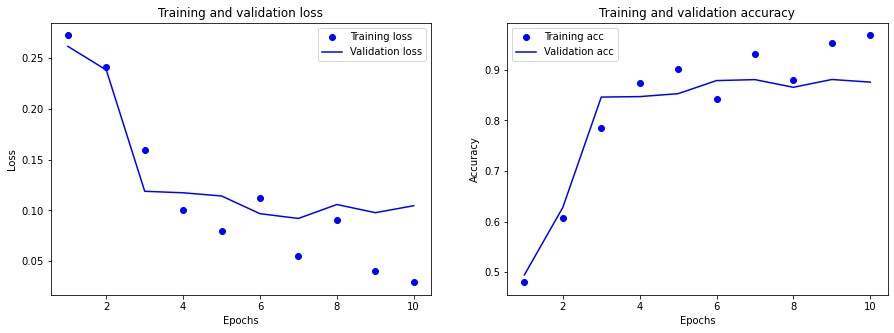

Katman Sayısı:18
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:relu


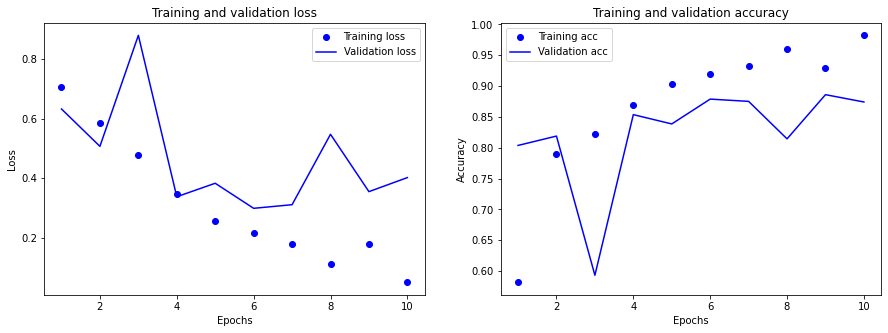

Katman Sayısı:18
Dense Sayisi:64
Batch size:2048
Kayıp Fonksiyonu:binary_crossentropy
Aktivasyon fonksiyonu:tanh


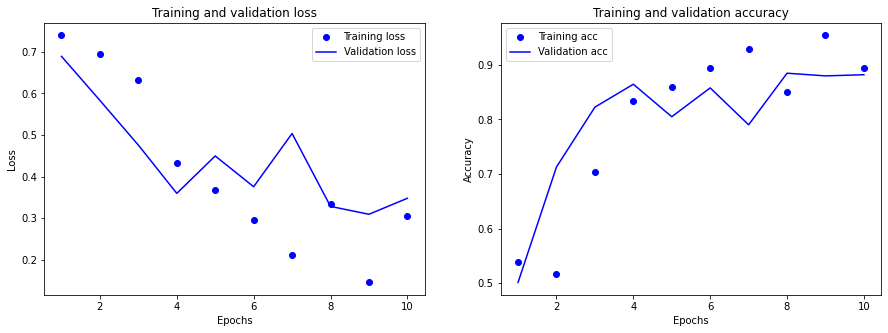

In [34]:
for katmanSayisi in [0, 6, 15]:
    for denseSayisi in [16, 64]:
        for batchSize in [128,512,2048]:
            for kayipFonk in ["mse", "binary_crossentropy"]:
                for aktivasyonFonk in ["relu","tanh"]:
                    print(f"Katman Sayısı:{katmanSayisi+3}\nDense Sayisi:{denseSayisi}\nBatch size:{batchSize}\nKayıp Fonksiyonu:{kayipFonk}\nAktivasyon fonksiyonu:{aktivasyonFonk}")
                    model = models.Sequential()
                    model.add(layers.Dense(denseSayisi, activation=aktivasyonFonk, input_shape=(10000,)))
                    for _ in range(katmanSayisi):
                        model.add(layers.Dense(denseSayisi, activation=aktivasyonFonk))
                    model.add(layers.Dense(1, activation='sigmoid'))

                    model.compile(optimizer='rmsprop',
                                  loss=kayipFonk,
                                  metrics=['acc'])

                    history = model.fit(partial_x_train,
                                        partial_y_train,
                                        epochs=10,
                                        batch_size=batchSize,
                                        validation_data=(x_val, y_val),
                                        verbose = 0)

                    results = model.evaluate(x_test, y_test, verbose = 0)

                    history_dict = history.history

                    plt.figure(figsize=(15,5))
                    plt.subplot(1,2,1)
                    history_dict = history.history
                    loss_values = history_dict['loss']
                    val_loss_values = history_dict['val_loss']

                    acc = history_dict["acc"]

                    epochs = range(1, len(acc) + 1)

                    plt.plot(epochs, loss_values, 'bo', label='Training loss') 
                    plt.plot(epochs, val_loss_values, 'b', label='Validation loss') 
                    plt.title('Training and validation loss')
                    plt.xlabel('Epochs')
                    plt.ylabel('Loss')
                    plt.legend()

                    plt.subplot(1,2,2)

                    val_acc = history_dict['val_acc']
                    plt.plot(epochs, acc, 'bo', label='Training acc')
                    plt.plot(epochs, val_acc, 'b', label='Validation acc')
                    plt.title('Training and validation accuracy')
                    plt.xlabel('Epochs')
                    plt.ylabel('Accuracy')
                    plt.legend()
                    plt.show()